In [486]:
import numpy as np
import re
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition.online_lda import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from collections import Counter
import sklearn.feature_extraction.text as text
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import gensim
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from nltk.tag import pos_tag
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import heapq
import warnings
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from gensim.models.doc2vec import LabeledSentence
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import plotly 
plotly.tools.set_credentials_file(username='nav595', api_key='eklkxyf2BaeJLxOiZPt1')
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib as mpl
from sklearn.manifold import MDS
import pyLDAvis
import mpld3
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


#import plotly.graph_objs as go

#import pyLDAvis


%matplotlib inline

warnings.filterwarnings('ignore')

In [487]:
#import string
x = []
movies_list = []
movie_labels = []
import re
import glob
for filename in glob.glob('*.srt'):
    movie_labels.append(filename)
    with open(filename) as f:
        print(filename)
        data = ''.join(i for i in f.read() if not i.isdigit())
    #lines = (line.rstrip() for line in f)
    #lines = (line for line in lines if line) 
    
        txt = data.split("\n")
        filtered = filter(lambda x: not re.match(r'^\s*$', x), txt)
    for line in filtered:
        #a = 1
        #print(line)
        line = re.sub(r'::, --> ::,','', line)
        line = re.sub(r'<font color="#ffff" size=>www.moviesubtitles.org</font>','',line)
        line = re.sub(r'\ufeff','', line)
        line = re.sub(r'Subtitle created by <font color="#ffff">- Aorion -</font>','',line)
        line = re.sub(r'</font>','', line)
        line = re.sub(r'<font color="#ffba">','', line)
        line = re.sub(r'<i>','', line)
        line = re.sub(r'</i>','', line)
        line = re.sub(r'Translated by Has_World','',line)
        #line = re.sub(r'  Sync and corrections by explosiveskull www.addiced.com  ','',line)

        #line = line.strip()
        #line = "".join(line)
        x.append(line)
    #print(data)


        h = " ".join(line for line in x)
    movies_list.append(h)
    x = []

10 Cloverfield Lane.BrRip.en.srt
12 Years A Slave.PublicHD.en.srt
Amazing Spider Man 2 The.Bluray.BLOW.en.srt
American Sniper (2014).DVDScr.en.srt
Annabelle.WEB-DL.RARBG.en.srt
Ant Man.SHERiF.en.srt
Argo (2012).720p.en.srt
Avengers The (2012).TS.sC0rp.en.srt
Babadook The.720p.BlueRay.AMIABLE.en.srt
Batman v Superman Dawn of Justice (2016).HD-TS.CM8.en.srt
Birdman.WEB-DL.RARBG.en.srt
Black Mass.WEBRip.SS.en.srt
Blair Witch.HD-TS.CPG.en.srt
Blended.Bluray.SPARKS.en.srt
Boyhood.Bluray.YIFY.en.srt
Captain America The Winter Soldier.SPARKS.en.srt
Chappie.720p.BlueRay.YIFY.en.srt
Conjuring The (2013).JYK.en.srt
Creep.WEB-DL.en.srt
Dark Knight The Batman The Dark Knight .720p.ESiR.en.srt
Dark Stranger The.WEB-DL.FGT.en 2.srt
Dark Stranger The.WEB-DL.FGT.en 3.srt
Dark Stranger The.WEB-DL.FGT.en.srt
Divergent.Bluray.SPARKS.en.srt
Django Unchained (2012).DVDScr.ETRG.en.srt
Doctor Strange.HD-TS.CPG.en.srt
Edge Of Tomorrow.Bluray.YIFY.en.srt
Everest.HDRip.RARBG.en.srt
Exorcism Of Emily Rose The (2

In [488]:
movies_y = [0,0,1,2,3,1,3,2,3,2,4,0,1,4,0,2,2,3,3,3,0,0,0,
            1,2,2,2,0,3,3,2,4,1,0,2,1,5,0,0,3,4,1,2,3,2,4,1,4,
            5,1,0,0,2,3,1,5,4,4,0,1,2,5,1,5,5,5,2,4,0,1,3,4,4,
            3,3,1,0,3,4,2,3,0,2,0,5,2,1,4,1,4,3,3,2,2,0,0,1,5,4,1]

## EDA

In [489]:
dict_movies = Counter(movies_y)
dict_movies

Counter({0: 20, 1: 18, 2: 20, 3: 18, 4: 15, 5: 9})

In [490]:
y = []
for genre,movies in dict_movies.items():
    y.append(movies)

In [491]:
fig = {
    'data': [{'labels': ['Drama', 'Mystery/Adventure', 'Action','Thriller','Romance/Comedy','Scifi'],
              'values': [20,18,20,18,15,9],
              'type': 'pie'}],
    'layout': {'title': 'Movie Genres'}
     }

py.iplot(fig)

## As is clear , the baseline performance = 100/6 

In [492]:
stopped_english = []
stopped_english = stopwords.words('english')

In [493]:
tokenizer = RegexpTokenizer(r'\w+')
for i in movies_list:
    
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in stopped_english]

In [494]:
not_needed = ['oh','know','right','hey','well','gonna','okay','try','go','hopps','yeah','got','get','one','want'
             ,'sir','judy','yes','think','come','like','everyhing','see','fox','please','zootopia','thank','cop',
             'uh','could','give','bye','nick','otterton','look','going','never','day','keep','let','us','hmm','mmm',
             'tell','make','new','say','emmitt','huh','whoa','even','mr','zpd','run','way','much','start','two','thought',
             'making','talking','place','may','thing','call','though','said','bogo','carrot','went','sorry','sure',
             'nice','done','name','gotta','ever','hello','ugh','since','listen','h','everybody','still','till','called',
             'tundratown','bad','everyone','bellwether','every','another','fine','hi','butt','remember','always','wilde',
             'boy','guy','wow','trying','end','word','saw','together','put','reach','made','nangi','dad','excuse',
             'told','enough','talk','wanted','care','looking','family','things','looks','doug','getting','nothing',
             'em','baby','gazelle','someone','wrong','cams','humped','rug','ha','might','maybe','face','um','open','pen',
             'hit','buddy','work','whatever','jerk','rainforest','jaguar','bit','none','tax','heard','jude','important',
             'deal','police','around','sheep','kid','red','weasel','ah','gone','feel','aw','camel','hero','mime','popsicles',
             'assistant','without','pop','along','skunk','pay','stu','hut','mrs','fluff','probably','away','next','starts',
             'questions','cut','half','ho','cannot','else','ways','pal','sahara','wanna','long','small','donut','catch',
             'lot','welcome','finally','use','seem','watch','daddy','gosh','whoopsie','line','part','sent','beat','foxes',
             'ooh','right','left','mama','jumbo','bon','seen','anymore','ago','write','far','tujunga','dna','dickens',
             'holicithias','baa','delgato','nicholas','bears','ask','meh','higgins','lion','bunnyburrow','fangmeyer',
             'gid','mom','rabbits','tuh','ow','benjamin','snarlov','weaselton','om','father','midnicampum','mchorn','boss',
             'daughter','woo','podunk','yay','fuck','fucking','dr','shit','mommy','ok','mm','ass','goddamn','john','dude']

In [495]:
stopped_english.extend(not_needed )

In [496]:
tagged = pos_tag(stopped_tokens)

In [497]:
#propernouns = [word for word,pos in tagged if pos == 'NNP' and pos == 'VB']
propernouns = [word for word,pos in tagged if pos == 'NNP' and pos == 'NNPS']

In [498]:
stopped_english.extend(propernouns)

In [499]:
a = []
for word,pos in tagged:
    a.append(pos)
   
dict1 = Counter(a)
    

In [500]:
x = []
y = []
for key,value in dict1.items():
    x.append(key)
    y.append(value)


## Plot of part of speech tagger , to determine the words to not be considered like prepositions(IN) etc.

In [501]:
data = [go.Bar(
            x=x,
            y=y
    )]

py.iplot(data, filename='pos-bar')

## Plot of 10 most occuring words , apart from the stop words in stopped_english 

By doing this we can remove words that are most occuring , but do not convey a meaning that would differentiate topics

In [502]:
x = []
y = []
a = Counter(stopped_tokens)
for key,value in a.most_common(10):
    x.append(key)
    y.append(value)

In [503]:
data = [go.Bar(
            x=x,
            y=y
    )]

py.iplot(data, filename='pos-bar')

## NMF COUNT VECTORIZER

In [504]:
max_features=1000
max_df=0.95,  
min_df=2,
max_features=1000,
stop_words='english'

In [505]:
vectorized = CountVectorizer(max_features=200,max_df=0.8,min_df=0.2,stop_words=stopped_english,ngram_range=(1,4))

In [506]:
docterm = vectorized.fit_transform(movies_list)
docterm.shape


(100, 200)

In [507]:
model = NMF(init="nndsvd",
            n_components=6,
            max_iter=200)

In [508]:
W = model.fit_transform(docterm)
H = model.components_

In [509]:
W.shape

(100, 6)

In [510]:
H.shape

(6, 200)

In [511]:
terms = [""] * len(vectorized.vocabulary_)
for term in vectorized.vocabulary_.keys():
    terms[vectorized.vocabulary_[term]] = term

In [512]:
terms[-5:]

['woman', 'working', 'worry', 'year', 'young']

In [513]:
for topic_index in range(H.shape[0]):
    top_indices = np.argsort(H[topic_index,:])[::-1][0:10]
    term_ranking = [terms[i] for i in top_indices]
    print("Topic {}: {}".format(topic_index, ", ".join(term_ranking)))

Topic 0: men, war, hell, five, agent, door, minutes, case, killed, speaking
Topic 1: guys, house, party, school, cool, fun, kids, happy, honey, friends
Topic 2: jack, wish, house, room, five, door, girl, alone, white, wife
Topic 3: alright, color, guys, problem, power, easy, human, fire, top, team
Topic 4: mark, friends, guys, party, problem, business, also, money, school, asked
Topic 5: roll, lord, black, damn, children, year, free, white, pick, speak


## NMF tfidf

In [514]:
tfidf = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
docterm1 = tfidf.fit_transform(movies_list)

In [515]:
new_model = NMF(init="nndsvd",
            n_components=7,
            max_iter=200)
W = new_model.fit_transform(docterm1)
H = new_model.components_
terms = [""] * len(vectorized.vocabulary_)
for term in vectorized.vocabulary_.keys():
    terms[vectorized.vocabulary_[term]] = term

In [516]:
for topic_index in range(H.shape[0]):
    top_indices = np.argsort(H[topic_index,:])[::-1][0:10]
    term_ranking = [terms[i] for i in top_indices]
    print("Topic {}: {}".format(topic_index, ", ".join(term_ranking)))

Topic 0: mine, water, drink, wake, alone, minute, pick, town, week, minutes
Topic 1: quite, ahead, times, sometimes, killed, case, also, law, alright, agent
Topic 2: point, scared, boys, anyone, brother, change, children, car, hour, school
Topic 3: death, city, tomorrow, walk, somebody, question, killed, alright, reason, light
Topic 4: matter, touch, party, lord, different, chance, happening, speaking, died, true
Topic 5: phone, easy, dark, dream, five, crazy, means, guys, mark, met
Topic 6: cool, side, system, men, human, hurt, kids, eye, started, read


## LDA using count vectorizer

In [517]:
cv = CountVectorizer(max_features=200,max_df=0.8,min_df=0.2,stop_words='english',ngram_range=(1,4))
#vectorized = cv.fit_transform(movies_list)

In [518]:
lda = LatentDirichletAllocation(n_topics=6,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
#                                 random_state=42
                               )

In [519]:
docterm = cv.fit_transform(movies_list)
lda.fit(docterm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [520]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics in LDA model:")
tf_feature_names = cv.get_feature_names()
print_top_words(lda, tf_feature_names)

Topics in LDA model:
Topic #0:
ok jack speaking dad guys mom uh hi door room phone girl house honey huh mr miss woman happy kids
Topic #1:
fucking fuck shit uh guys hi wanna mom house car huh dad um yeah yeah baby cool okay okay wow hey hey hmm
Topic #2:
mr alright guys uh house dad war boy shit hi story oh oh mom father huh minutes color tomorrow girl wants
Topic #3:
okay okay guys dad gotta daddy dream shit jack honey come come mom hi safe buddy um scared wanna door mommy house
Topic #4:
ain mr wanna gotta boy hell shit agent damn men guys em money john mark black team red ass killed
Topic #5:
father mom mr dad dream uh dr case black wanna save dark truth um children power matter huh death men



## LDA using tfidf

In [521]:
tf = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
vectorized = tf.fit_transform(movies_list)

In [522]:
lda = LatentDirichletAllocation(n_topics=6,
                                max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=42
                               )

In [523]:
lda.fit(vectorized)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=6, perp_tol=0.1, random_state=42,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [524]:
print(lda.components_)
tf.get_feature_names()

[[ 0.81056563  0.84405529  0.75231849 ...,  0.7585861   0.86324174
   0.72904563]
 [ 0.80345924  0.74063625  0.73555217 ...,  0.70398851  0.76010203
   0.80518659]
 [ 0.75290761  0.74228903  0.74330785 ...,  0.80128138  0.77195306
   0.77786852]
 [ 0.7510259   0.6548046   0.83584864 ...,  0.88193737  0.77928165
   0.9147413 ]
 [ 0.67741525  0.70096113  0.70788372 ...,  0.85671723  0.70403955
   0.81663433]
 [ 1.14565324  0.85808028  0.59039097 ...,  0.69895656  0.76156549
   0.69944147]]


['aaron',
 'aii',
 'alex',
 'alfred',
 'alyra',
 'amsterdam',
 'anna',
 'asgard',
 'ashley',
 'bacall',
 'back font',
 'banner',
 'base camp',
 'bb',
 'beans',
 'beck',
 'becky',
 'benji',
 'black hole',
 'bong',
 'bounty',
 'break break',
 'brittle',
 'buchanan',
 'bucky',
 'budapest',
 'bum bum',
 'bunny',
 'caleb',
 'calvin',
 'cameron',
 'cardinal',
 'carl',
 'carrots',
 'catholic',
 'chanting',
 'chow',
 'claire',
 'codes',
 'comic',
 'communist',
 'connolly',
 'coop',
 'cooper',
 'corn',
 'cub',
 'dalton',
 'dark stranger',
 'darren',
 'dawson',
 'demons',
 'dent',
 'diana',
 'dimension',
 'ding',
 'dory',
 'droid',
 'eddie',
 'ellis',
 'emma',
 'enigma',
 'eric',
 'erik',
 'ethan',
 'evelyn',
 'everest',
 'exorcism',
 'festival',
 'fischer',
 'fitzgerald',
 'foreign language',
 'fu',
 'gatsby',
 'giants',
 'gordon',
 'gotham',
 'granny',
 'griff',
 'griffin',
 'gwen',
 'hank',
 'harold',
 'harvard',
 'heather',
 'heist',
 'hendricks',
 'hercules',
 'hindu',
 'hockey',
 'hong',
 

In [525]:
def print_top_words(model, feature_names, n_top_words=20):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

print("Topics in LDA model:")
tf_feature_names = tf.get_feature_names()
print_top_words(lda, tf_feature_names)

Topics in LDA model:
Topic #0:
monsieur noah connolly richard parker maze gatsby sol speaking french michelle nasa porter fitzgerald dory isaac rumbling leah toth toth static stevie iran
Topic #1:
summit claire bounty dawson gwen dalton riley thee foreign language diana cardinal inspector bunny net hank darren samuel simon panther snowden
Topic #2:
leah carl toth mac jay loki ruth rita fischer heist ding dimension droid emma toby alyra bb omega ii griff
Topic #3:
communist dent marty cub evelyn lorraine turing kate vince sans codes cardinal matt joan fitzgerald harvard becky darren comic gordon
Topic #4:
eddie banner mason rugby moore ross stevie hercules tommy tommy sparta heather quarantine beans fu chanting po pi emma ethan demons
Topic #5:
chow tyler back font isaac aaron susan roll roll amsterdam eric cooper caleb time font muslim maddie anna rogers ii hydra murph solomon



In [526]:
v = lda.transform(vectorized)
v = v * 100
v

array([[ 57.93725442,   8.41058075,   8.42399724,   8.39613777,
          8.41024304,   8.42178679],
       [  6.82023306,   6.82875319,   6.83882525,   6.83039004,
          6.8199457 ,  65.86185276],
       [  7.25264348,  63.76512059,   7.2461881 ,   7.25052052,
          7.24188398,   7.24364334],
       [ 58.11360366,   8.36372464,   8.3902847 ,   8.36987469,
          8.37752202,   8.38499028],
       [  5.42795116,   5.41640044,  72.90423718,   5.41498483,
          5.41736074,   5.41906565],
       [  6.54048726,  67.27656342,   6.55087477,   6.54853054,
          6.54337129,   6.54017272],
       [  5.98219169,  70.13195249,   5.96747935,   5.97327539,
          5.97315518,   5.97194589],
       [  5.14190251,   5.13808997,  74.27172078,   5.15147604,
          5.14827543,   5.14853527],
       [  6.25408314,  68.79755848,   6.2368177 ,   6.23599847,
          6.23606835,   6.23947387],
       [  6.45580513,   6.45741805,  67.68827689,   6.4704721 ,
          6.45782424,   6.4

In [527]:
idx = pd.Index(movie_labels)
df = pd.DataFrame(v, index=idx, columns=['Drama', 'Mystery/Adventure', 'Action', 'Thriller', 'Comedy/Romance','Scifi'])
vals = np.around(df.values,2)
normal = plt.Normalize(vals.min()-40, vals.max()+1)

#fig = plt.figure(figsize=(10,25))
#ax = fig.add_subplot(111, frameon=True, xticks=[], yticks=[])

the_table=plt.table(cellText=vals, rowLabels=df.index, colLabels=df.columns, 
                    colWidths = [0.3]*vals.shape[1],  loc = 'outside',
                    cellColours=plt.cm.hot(normal(vals)))

the_table.set_fontsize(60)
the_table.scale(6.0, 6.0)   

In [528]:
lda_predicted = [np.argmax(i) for i in v]
accuracy = 0
for i,j in zip(lda_predicted,movies_y):
    if i == j:
        accuracy += 1
print("The accuracy for the same is",accuracy)

The accuracy for the same is 33


In [529]:
dict_movies_actual = Counter(movies_y)
dict_movies_predicted = Counter(lda_predicted)

In [530]:
actual_x = []
actual_y = []
for key,value in dict_movies_actual.items():
    actual_x.append(key)
    actual_y.append(value)

In [531]:
predicted_x = []
predicted_y = []
for key,value in dict_movies_predicted.items():
    predicted_x.append(key)
    predicted_y.append(value)

In [532]:
fig = {
  "data": [
    {
      "values": actual_y,
      "labels": [
        "Drama",
        "Mystery/Adventure",
        "Action",
        "Thriller",
        "Romance/Comedy",
        "Scifi"
        
      ],
      "domain": {"x": [0, .48]},
      "name": "Actual Genres",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    {
      "values": predicted_y,
      "labels": [
        "Drama",
        "Mystery/Adventure",
        "Action",
        "Thriller",
        "Romance/Comedy",
        "Scifi"
      ],
      "text":"Predicted",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Predicted",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Actual vs Predicted",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Actual",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Predicted ",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)

In [533]:
lda.transform(vectorized).shape[0] # Number of documents

# Pick a random document
import random

doc_id = random.randint(0, lda.transform(vectorized).shape[0])

print("For Document:", movies_list[doc_id])
print("-"*10)
for topic_number, topic_weighting in enumerate(lda.transform(vectorized)[doc_id], 1):
    print("topic number: {} \t weight: {:.2}".format(topic_number, topic_weighting))

For Document:  Hot weather.  Land here it feels like dog's stool.  You know, huh?  Fuck!  Smashed.  There are men of military force, are call, pay attention to the convoy. Replace.  If she reported troop movements please shoot. Your turn. Replace.  Maybe he called his wife.  He dropped.  One Moment. There were women and children, within  yard, moving towards the convoy.  His arm is not moving. He was carrying something.  He pulls out a grenade. RKG grenade Russia. I think he gave it to the boy.  - Women and children? - Did you see it? Can insure?  Negative. You know ROE. Your turn.  - They will menggorengmu if you're wrong. They will put you in jail. - Fuck.  You managed to hit it.  Back here.  Never leave rifle on the ground.  Yes, Sir.  Good shot. You're talented.  One day you will be a great hunter.  Listen to this book, several times. That judgment ..  for the trust.  Time where we have to do it. We can not see with his eyes.  So we do not know the glory of his plans.  Our eyes see

## LDA Visualization

In [534]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(movies_list)
print(dtm_tf.shape)


(100, 2301)


In [535]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(movies_list)
print(dtm_tfidf.shape)


(100, 2301)


In [536]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=6, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=6, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=6, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [537]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tfidf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      36.504194        1       1  0.040301 -0.010459
1      32.163174        1       2  0.006971 -0.013579
4      11.313788        1       3  0.016083 -0.099600
5       9.944327        1       4 -0.145526  0.016305
3       7.109203        1       5  0.010365  0.052347
2       2.965315        1       6  0.071805  0.054985, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
799   Default  2155.000000        font  2155.000000  30.0000  30.0000
1075  Default   214.000000        jack   214.000000  29.0000  29.0000
50    Default   320.000000     alright   320.000000  28.0000  28.0000
1704  Default   100.000000         rob   100.000000  27.0000  27.0000
1087  Default   247.000000        john   247.000000  26.0000  26.0000
400   Default   189.000000       color   189.000000  25.0000  25.0000
840   Default   639.000000     fucking   639.000000  24.0000  24.0000
1395  Default   116.000000         ooh   116.000000  23.0000  23.0000
2275  Default   122.000000       woods   122.000000  22.0000  22.0000
1438  Default   141.000000     parents   141.000000  21.0000  21.0000
1250  Default    87.000000        mate    87.000000  20.0000  20.0000
2076  Default    71.000000      thomas    71.000000  19.0000  19.0000
611   Default   162.000000       dream   162.000000  18.0000  18.0000
1282  Default   105.000000        mike   105.000000  17.0000  17.0000
1903  Default   192.000000    speaking   192.000000  16.0000  16.0000
984   Default   237.000000       honey   237.000000  15.0000  15.0000
838   Default   580.000000        fuck   580.000000  14.0000  14.0000
1302  Default   155.000000       mommy   155.000000  13.0000  13.0000
289   Default    67.000000        camp    67.000000  12.0000  12.0000
1380  Default    62.000000       ocean    62.000000  11.0000  11.0000
1969  Default    90.000000    stranger    90.000000  10.0000  10.0000
1899  Default   112.000000       south   112.000000   9.0000   9.0000
141   Default    63.000000        base    63.000000   8.0000   8.0000
282   Default    74.000000        cage    74.000000   7.0000   7.0000
469   Default    63.000000         cow    63.000000   6.0000   6.0000
1920  Default    61.000000       sport    61.000000   5.0000   5.0000
866   Default    67.000000       giant    67.000000   4.0000   4.0000
41    Default   295.000000         ain   295.000000   3.0000   3.0000
778   Default    61.000000        fish    61.000000   2.0000   2.0000
1253  Default   195.000000         max   195.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
1648   Topic6    12.598674     release    53.676756   2.0688  -5.4199
284    Topic6     7.340700  california    32.037817   2.0447  -5.9601
1395   Topic6    25.442952         ooh   116.543038   1.9964  -4.7171
778    Topic6    13.275183        fish    61.562657   1.9840  -5.3676
2236   Topic6     5.894770     weather    28.703633   1.9352  -6.1794
1715   Topic6     5.792370        rope    28.483827   1.9254  -6.1970
2060   Topic6     6.872029        term    34.178512   1.9140  -6.0260
874    Topic6     5.411996     glasses    27.368137   1.8974  -6.2649
378    Topic6     7.805725       climb    39.490955   1.8970  -5.8986
1428   Topic6     5.307170        pair    27.280714   1.8811  -6.2844
337    Topic6    11.330040     charlie    58.310352   1.8799  -5.5260
1996   Topic6     4.832088      suffer    25.660955   1.8485  -6.3782
2212   Topic6     4.924768       walls    26.445823   1.8374  -6.3592
783    Topic6     6.367640       fixed    34.679986   1.8233  -6.1023
877    Topic6     2.910669        goal    15.877133   1.8217  -6.8851
1438   Topic6    23.708565     parents   141.303032   1.7331  -4.7877
50     Topic6    45.009351     alright   320.432875   1.5554  -4.1466
1282   Topic6    15.44268

In [538]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))
dtm_tf = tfidf_vectorizer.fit_transform(movies_list)
print(dtm_tf.shape)

(100, 200)


In [539]:
tfidf_vectorizer1 = TfidfVectorizer(**tfidf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer1.fit_transform(movies_list)
print(dtm_tfidf.shape)

(100, 200)


In [540]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_topics=6, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_topics=6, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=6, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [541]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tfidf_vectorizer)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
4      19.373505        1       1  0.025629  0.001199
5      18.244944        1       2  0.002496 -0.036945
0      17.303333        1       3 -0.034781  0.003113
1      16.427254        1       4  0.009192  0.019349
3      15.677243        1       5 -0.003594  0.004765
2      12.973722        1       6  0.001058  0.008518, topic_info=     Category      Freq              Term     Total  loglift  logprob
term                                                                 
107   Default  1.000000              leah  1.000000  30.0000  30.0000
36    Default  1.000000              chow  1.000000  29.0000  29.0000
32    Default  1.000000              carl  1.000000  28.0000  28.0000
137   Default  1.000000              noah  1.000000  27.0000  27.0000
51    Default  0.000000              dent  0.000000  26.0000  26.0000
124   Default  1.000000              maze  1.000000  25.0000  25.0000
45    Default  0.000000               cub  0.000000  24.0000  24.0000
129   Default  1.000000          monsieur  1.000000  23.0000  23.0000
41    Default  1.000000          connolly  1.000000  22.0000  22.0000
158   Default  0.000000              ross  0.000000  21.0000  21.0000
72    Default  0.000000            gatsby  0.000000  20.0000  20.0000
37    Default  0.000000            claire  0.000000  19.0000  19.0000
57    Default  0.000000             eddie  0.000000  18.0000  18.0000
59    Default  0.000000              emma  0.000000  17.0000  17.0000
97    Default  1.000000             isaac  1.000000  16.0000  16.0000
159   Default  0.000000             rugby  0.000000  15.0000  15.0000
165   Default  0.000000             simon  0.000000  14.0000  14.0000
103   Default  1.000000              kate  1.000000  13.0000  13.0000
156   Default  0.000000         roll roll  0.000000  12.0000  12.0000
153   Default  0.000000             riley  0.000000  11.0000  11.0000
0     Default  0.000000             aaron  0.000000  10.0000  10.0000
169   Default  0.000000           solomon  0.000000   9.0000   9.0000
190   Default  0.000000              toth  0.000000   8.0000   8.0000
113   Default  0.000000               mac  0.000000   7.0000   7.0000
20    Default  0.000000            bounty  0.000000   6.0000   6.0000
193   Default  0.000000             tyler  0.000000   5.0000   5.0000
171   Default  0.000000   speaking french  0.000000   4.0000   4.0000
194   Default  0.000000             vince  0.000000   3.0000   3.0000
82    Default  0.000000           harvard  0.000000   2.0000   2.0000
99    Default  0.000000               jay  0.000000   1.0000   1.0000
...       ...       ...               ...       ...      ...      ...
59     Topic6  0.278387              emma  0.799176   0.9877  -4.3299
158    Topic6  0.297998              ross  0.909450   0.9265  -4.2618
169    Topic6  0.262486           solomon  0.808617   0.9171  -4.3887
37     Topic6  0.297963            claire  0.924810   0.9096  -4.2619
82     Topic6  0.246035           harvard  0.779687   0.8888  -4.4534
57     Topic6  0.301450             eddie  0.959457   0.8845  -4.2503
153    Topic6  0.275685             riley  0.879096   0.8826  -4.3396
70     Topic6  0.248987  foreign language  0.794495   0.8819  -4.4415
194    Topic6  0.260683             vince  0.849717   0.8606  -4.3956
146    Topic6  0.236339                po  0.819518   0.7988  -4.4936
164    Topic6  0.219506              shen  0.769496   0.7879  -4.5675
96     Topic6  0.215145              iran  0.755720   0.7859  -4.5876
199    Topic6  0.204994        zuckerberg  0.747586   0.7484  -4.6359
19     Topic6  0.187999              bong  0.700611   0.7267  -4.7225
196    Topic6  0.170066   whistle blowing  0.711671   0.6108  -4.8227
98     Topic6  0.162089               jan  0.703101   0.5749  -4.8707
71     Topic6  0.158059                fu  0.702351   0.5508  -4.8959
156    Topic6  0.216646  


## Gensim LDA


In [542]:
texts = []
tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = stopwords.words('english')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
for i in movies_list:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    word_tokens = [i for i in stopped_tokens if not i in stopped_english]
    
    # add tokens to list
    texts.append(word_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=6, id2word = dictionary, passes=20)

In [543]:
print(ldamodel.print_topics(num_topics=6, num_words=5))

[(0, '0.008*good + 0.005*need + 0.005*take + 0.005*would + 0.005*people'), (1, '0.054*font + 0.053*ms + 0.053*comic + 0.053*sans + 0.006*alright'), (2, '0.010*good + 0.007*man + 0.007*back + 0.007*really + 0.007*time'), (3, '0.006*good + 0.005*would + 0.005*back + 0.005*take + 0.004*man'), (4, '0.009*good + 0.007*back + 0.007*need + 0.006*time + 0.006*take'), (5, '0.047*font + 0.043*tahoma + 0.005*back + 0.005*time + 0.005*would')]


## KMeans on LDA

In [544]:
kmeans = KMeans(n_clusters=6).fit(lda.transform(vectorized))

In [545]:
y_predk = kmeans.predict(lda.transform(vectorized))
y_pred

array([3, 3, 3, 1, 3, 3, 1, 1, 3, 1, 2, 0, 2, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0,
       3, 1, 1, 1, 0, 1, 1, 5, 2, 3, 1, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 2,
       3, 2, 3, 3, 4, 4, 1, 3, 3, 3, 2, 2, 4, 3, 1, 1, 3, 1, 3, 1, 1, 2, 2,
       3, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 3, 2, 1, 2, 2, 2, 3, 2, 3, 2, 3, 3,
       1, 1, 2, 2, 3, 1, 2, 3], dtype=int32)

In [549]:
tfidf_vectorizer = TfidfVectorizer(max_features=200,max_df=4,min_df=2,stop_words=stopped_english,ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(movies_list)
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[  0.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       ..., 
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   1.00000000e+00,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,  -2.22044605e-16,   1.00000000e+00],
       [  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
          1.00000000e+00,   1.00000000e+00,  -2.22044605e-16]])

In [550]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
pos


array([[ 0.78024879, -0.09627638],
       [ 0.62539522, -0.04001732],
       [-0.40473965, -0.39359098],
       [ 0.71893474,  0.27109946],
       [ 0.440019  ,  0.30119536],
       [-0.21230717,  0.5478813 ],
       [-0.57418098, -0.50816845],
       [-0.70501584, -0.14233197],
       [-0.62687286,  0.43152967],
       [ 0.50949486, -0.56495975],
       [-0.65586662, -0.38045285],
       [-0.72252811,  0.22239133],
       [-0.21629879,  0.72300821],
       [-0.0350179 ,  0.73177882],
       [ 0.51612929,  0.58538043],
       [-0.28762948,  0.04156751],
       [ 0.43831916, -0.46139793],
       [ 0.18739482,  0.15192155],
       [-0.77237841, -0.08704806],
       [-0.1425365 ,  0.19775311],
       [ 0.49529005,  0.23854982],
       [ 0.49529008,  0.23854981],
       [ 0.49529008,  0.23854981],
       [-0.60119745, -0.29333214],
       [ 0.34679622,  0.41077665],
       [-0.54261444,  0.54145794],
       [-0.28932684,  0.3631534 ],
       [ 0.05498091,  0.71891774],
       [ 0.28828539,

In [552]:
df1 = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels})
df1

label                                              title         x  \
0       4                   10 Cloverfield Lane.BrRip.en.srt  0.780249   
1       3                   12 Years A Slave.PublicHD.en.srt  0.625395   
2       2        Amazing Spider Man 2 The.Bluray.BLOW.en.srt -0.404740   
3       4               American Sniper (2014).DVDScr.en.srt  0.718935   
4       0                      Annabelle.WEB-DL.RARBG.en.srt  0.440019   
5       2                              Ant Man.SHERiF.en.srt -0.212307   
6       2                            Argo (2012).720p.en.srt -0.574181   
7       0                Avengers The (2012).TS.sC0rp.en.srt -0.705016   
8       2           Babadook The.720p.BlueRay.AMIABLE.en.srt -0.626873   
9       0  Batman v Superman Dawn of Justice (2016).HD-TS...  0.509495   
10      5                        Birdman.WEB-DL.RARBG.en.srt -0.655867   
11      4                        Black Mass.WEBRip.SS.en.srt -0.722528   
12      5                       Blair Witch.HD-TS.CPG.en.srt -0.216299   
13      3                       Blended.Bluray.SPARKS.en.srt -0.035018   
14      5                         Boyhood.Bluray.YIFY.en.srt  0.516129   
15      3   Captain America The Winter Soldier.SPARKS.en.srt -0.287629   
16      0                   Chappie.720p.BlueRay.YIFY.en.srt  0.438319   
17      1                    Conjuring The (2013).JYK.en.srt  0.187395   
18      3                                Creep.WEB-DL.en.srt -0.772378   
19      1  Dark Knight The Batman The Dark Knight .720p.E... -0.142537   
20      0              Dark Stranger The.WEB-DL.FGT.en 2.srt  0.495290   
21      0              Dark Stranger The.WEB-DL.FGT.en 3.srt  0.495290   
22      0                Dark Stranger The.WEB-DL.FGT.en.srt  0.495290   
23      3                     Divergent.Bluray.SPARKS.en.srt -0.601197   
24      2         Django Unchained (2012).DVDScr.ETRG.en.srt  0.346796   
25      0                    Doctor Strange.HD-TS.CPG.en.srt -0.542614   
26      0                Edge Of Tomorrow.Bluray.YIFY.en.srt -0.289327   
27      2                         Everest.HDRip.RARBG.en.srt  0.054981   
28      5  Exorcism Of Emily Rose The (2005).DVDRip.Dizzl...  0.288285   
29      5               Expendables 3 The.Bluray.YIFY.en.srt -0.577994   
..    ...                                                ...       ...   
70      3              No Escape.1080p.BlueRay.DRONES.en.srt  0.265159   
71      4                 Notebook The.DVDRip.DiAMOND.en.srt  0.716937   
72      2  Pink Panther 2 The.BRRIP.CaLLioPE-MoNTEDiaZ.en... -0.767329   
73      3                            Poltergeist.ETRG.en.srt -0.085829   
74      1                   Revenant The.DVDScr.NoGRP.en.srt  0.284156   
75      4                                    Ring The.en.srt  0.673326   
76      3                             Room.DVDScr.EVO.en.srt -0.171393   
77      1             Shutter Island (2010).R5.FUSiON.en.srt  0.098700   
78      1                          Sisters.WEBRip.FGT.en.srt  0.089507   
79      0                Slow West.720p.BlueRay.RARBG.en.srt  0.017841   
80      2                          Snowden.HDRip.ETRG.en.srt -0.394448   
81      1        Social Network The (2010).720p.METiS.en.srt  0.722177   
82      4                             Spectre.MkvCage.en.srt  0.741587   
83      1                        Spotlight.DVDScr.CM8.en.srt  0.621528   
84      0                            Spring.HDRip.EVO.en.srt  0.010782   
85      3                               Spy.HDRip.EVO.en.srt -0.170974   
86      0             Star Wars The Force Awakens.CPG.en.srt -0.371622   
87      4  Theory Of Everything The (2014).Bluray.YIFY.en... -0.721418   
88      1                   Thor The Dark World.BrRip.en.srt  0.597765   
89      2                     Titanic.HDRIP.TLF.part1.en.srt  0.129300   
90      1                   Transcendence.Bluray.YIFY.en.srt -0.455324   
91      1                           Trumbo.DVDScr.CM8.en.srt  0.140853   
92      

In [553]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5 : '#b6a61e' }

#set up cluster names using a dict
cluster_names = {0: 'Drama', 
                 1: 'Mystery/Adventure', 
                 2: 'Action', 
                 3: 'Thriller', 
                 4: 'Comedy/Romance',
                 5:'Scifi',
                  }

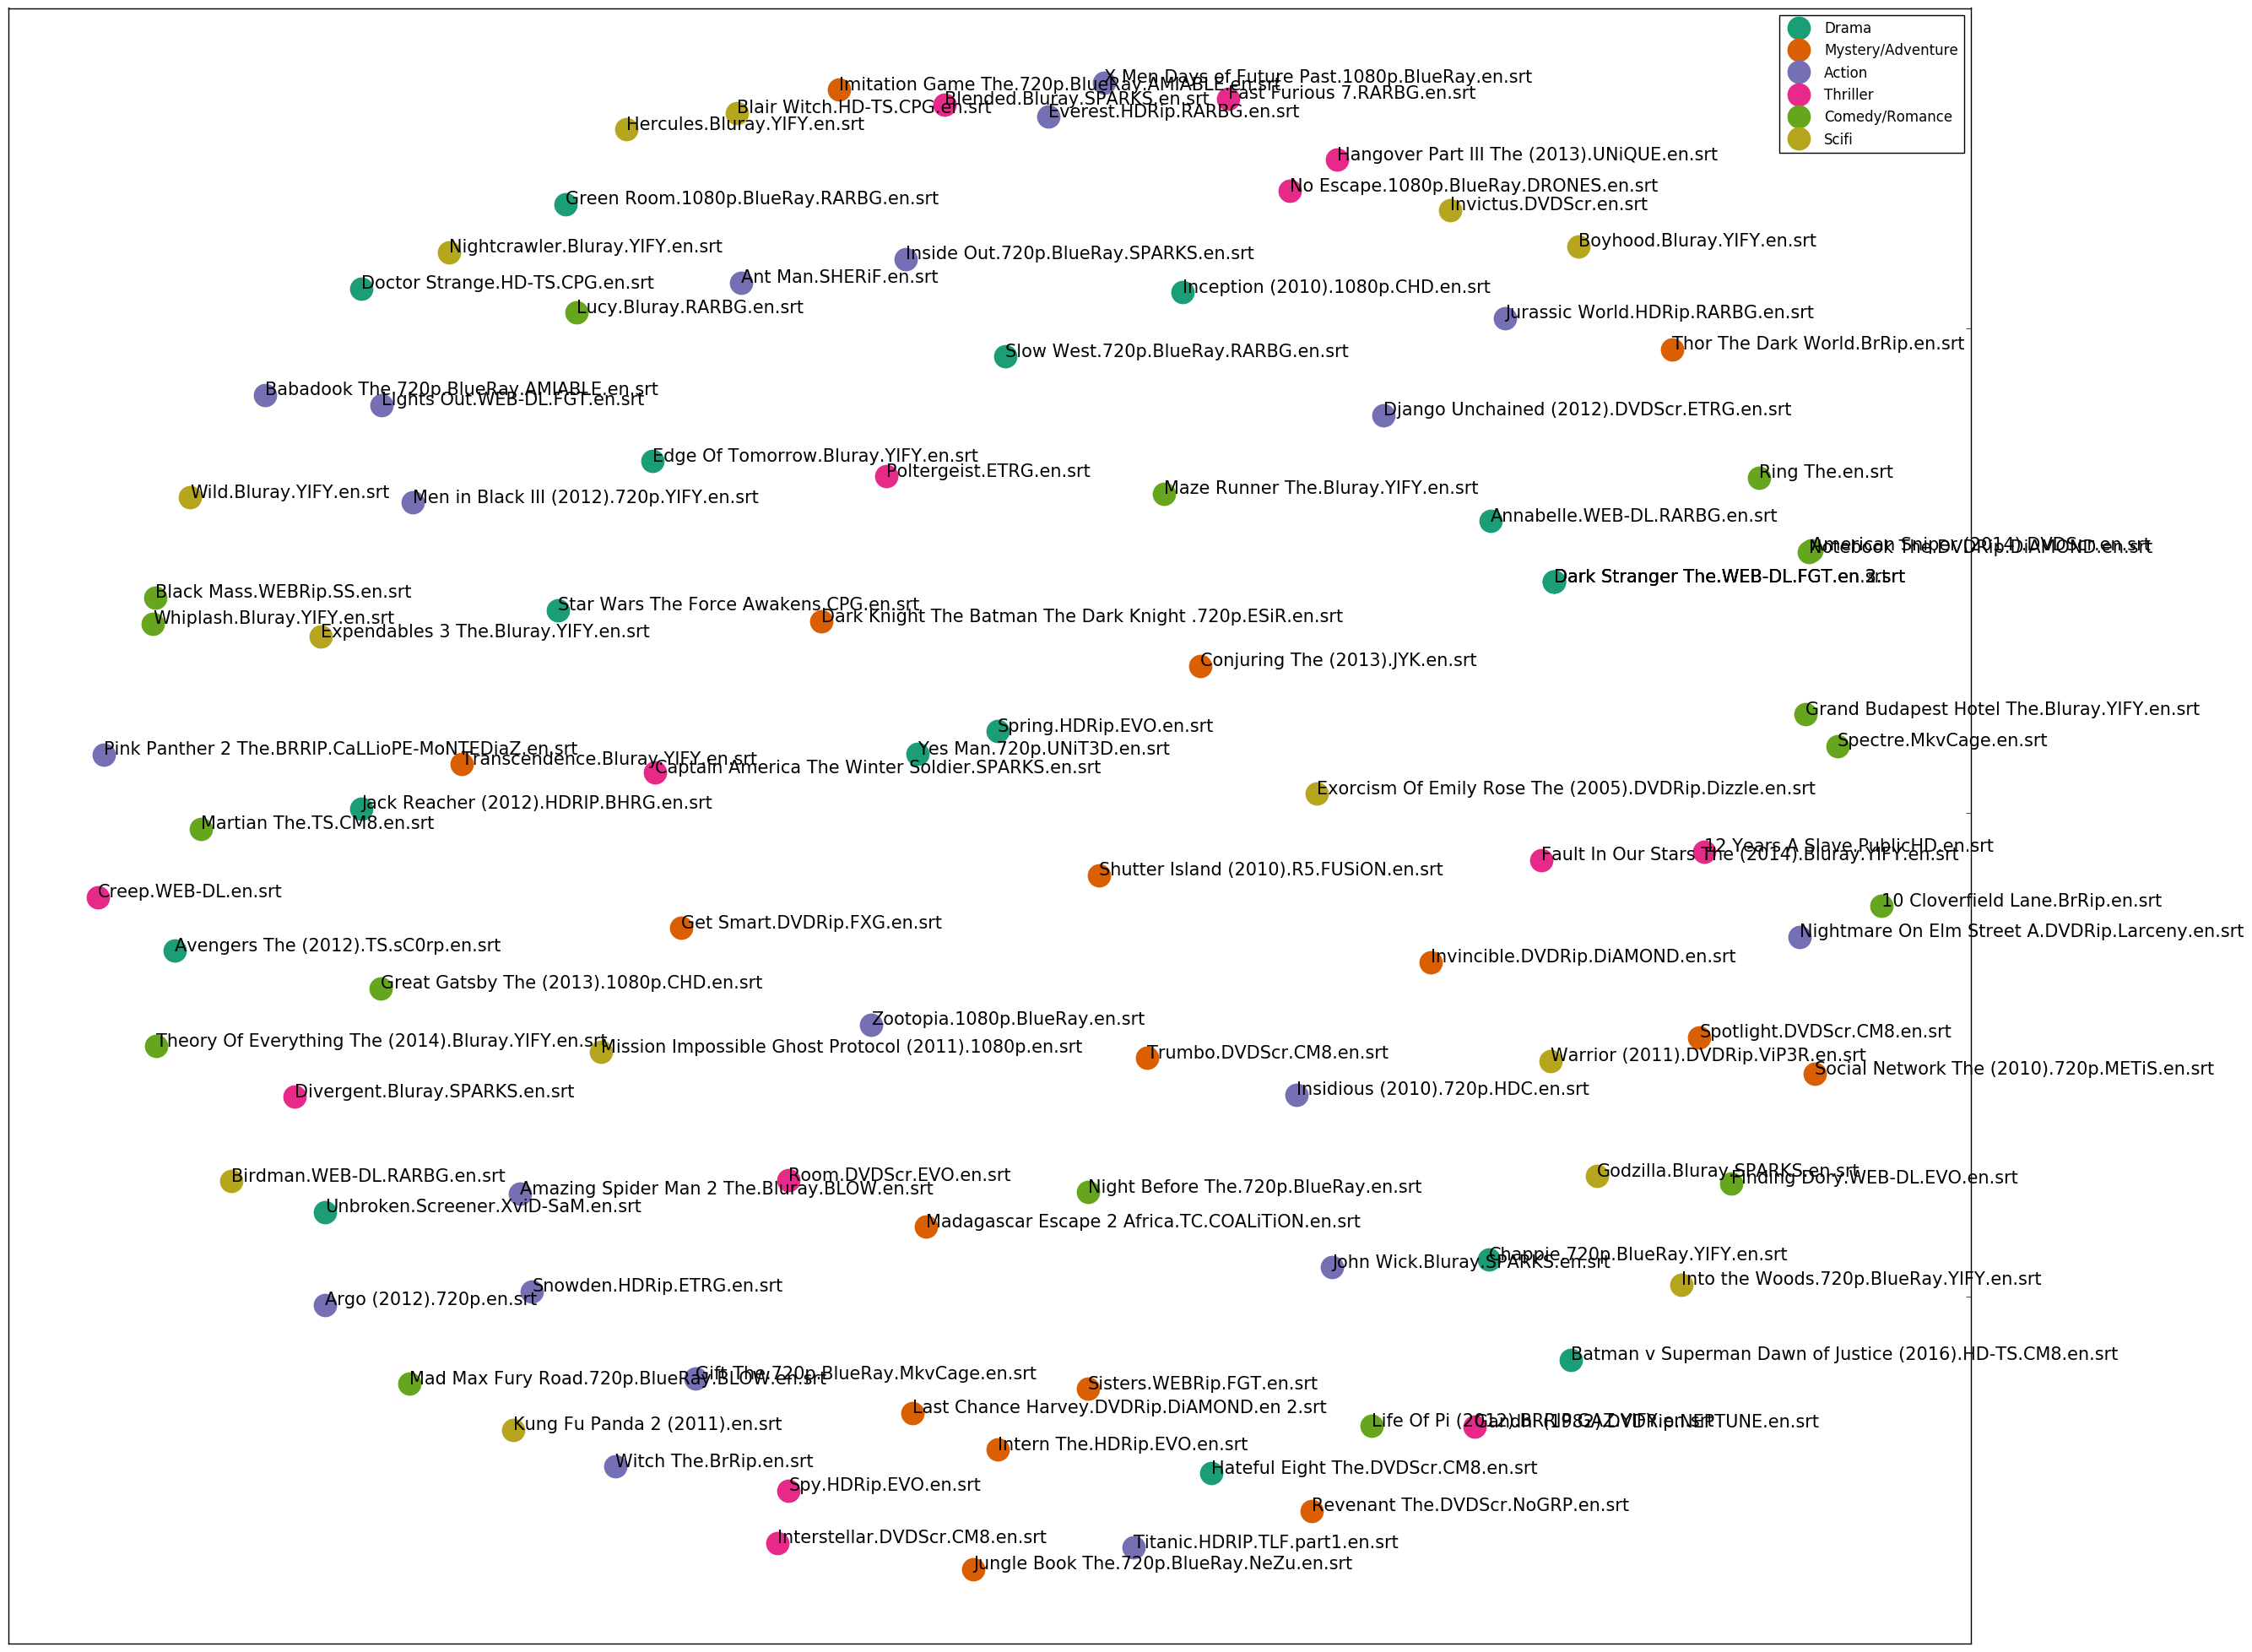

In [554]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels}) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(30, 25)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=15)  

    
    
plt.show() #show the plot



In [555]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 400);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [556]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_predk, 'title': movie_labels})  

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -150px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(16,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

## Random forest Classifier

In [557]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=4)

In [558]:
cv = CountVectorizer()
cv.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [559]:
X_train,X_test = cv.transform(X_train),cv.transform(X_test)

In [560]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test,y_test)

0.20000000000000001

## Confusion Matrix

a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.
Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}

In [562]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         2                     0          1            2                  1   
1         1                     1          1            2                  0   
2         0                     2          1            0                  1   
3         0                     2          3            0                  0   
4         2                     0          0            0                  1   
5         0                     1          1            0                  0   

   Scifi(5)  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0

## ROC Curve

In [563]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)

In [564]:
classifier = OneVsRestClassifier(RandomForestClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]

In [566]:
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

In [567]:
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

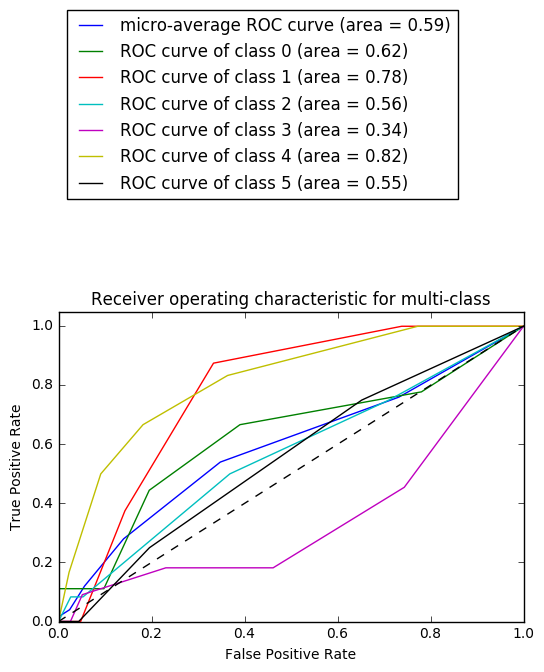

In [568]:
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Grid Search on random forests

In [569]:
cv = CountVectorizer()
cv.fit(movies_list)
movies_list_trans = cv.transform(movies_list)

In [570]:
param_grid = { "n_estimators"      : [250, 1000],
           "criterion"         : ["gini", "entropy"],
           "max_features"      : [3,4,5],
           "max_depth"         : [10, 20],
           "min_samples_split" : [2, 4] ,
           "bootstrap": [True, False]}

In [571]:
grid_search = GridSearchCV(rfc, param_grid, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'bootstrap': True, 'min_samples_split': 4, 'max_depth': 20, 'max_features': 3, 'n_estimators': 250}
0.41


## Randomized Search on Random Forest 

In [572]:
rand = RandomizedSearchCV(rfc, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(movies_list_trans, movies_y)
rand.grid_scores_
print(rand.best_score_)
print(rand.best_params_)

0.35
{'max_depth': 10, 'criterion': 'entropy', 'n_estimators': 1000, 'bootstrap': False, 'min_samples_split': 2, 'max_features': 3}


## ADA BOOST classifier

In [573]:
  
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=23)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)
abc.score(X_test,y_test)

0.32000000000000001

## Grid Search ADA boost

In [574]:
param_grid = {"n_estimators" : [100,200,1000],
              "learning_rate" : [0.1,0.001,1]
              }

In [575]:
grid_search = GridSearchCV(abc, param_grid, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_estimators': 200, 'learning_rate': 0.1}
0.31


## Confusion Matrix

In [576]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         1                     0          4            0                  0   
1         0                     0          0            0                  0   
2         0                     1          6            0                  0   
3         1                     0          5            0                  0   
4         1                     0          3            0                  1   
5         2                     0          0            0                  0   

   Scifi(5)  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0

## ROC Curve

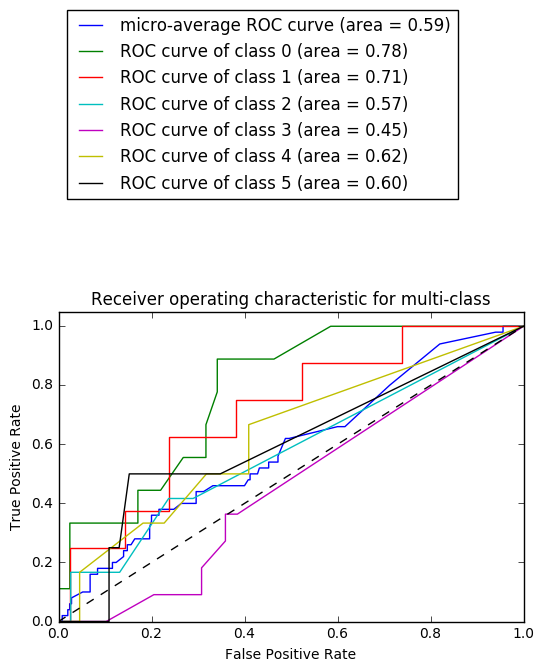

In [578]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(AdaBoostClassifier(learning_rate=0.1, n_estimators=200))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()


## Gradient Boosting Classifier

In [627]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=23)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
gbc = GradientBoostingClassifier()
gbc.fit(X_train.toarray(),y_train)
y_pred = gbc.predict(X_test.toarray())
print(gbc.score(X_test.toarray(),y_test))

0.32


## GRID SEARCH Gradient Boosting

In [628]:
parameters={'min_samples_split' : [20,30,40],'max_depth': [4,5,6,7]}
grid_search = GridSearchCV(gbc, parameters, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans.toarray(), movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 6, 'min_samples_split': 20}
0.26


## Confusion Matrix

In [629]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         2                     1          1            1                  0   
1         0                     0          0            0                  0   
2         1                     1          3            1                  0   
3         3                     0          1            1                  1   
4         0                     1          1            2                  1   
5         0                     0          1            0                  0   

   Scifi(5)  
0         0  
1         0  
2         1  
3         0  
4         0  
5         1

## ROC curve

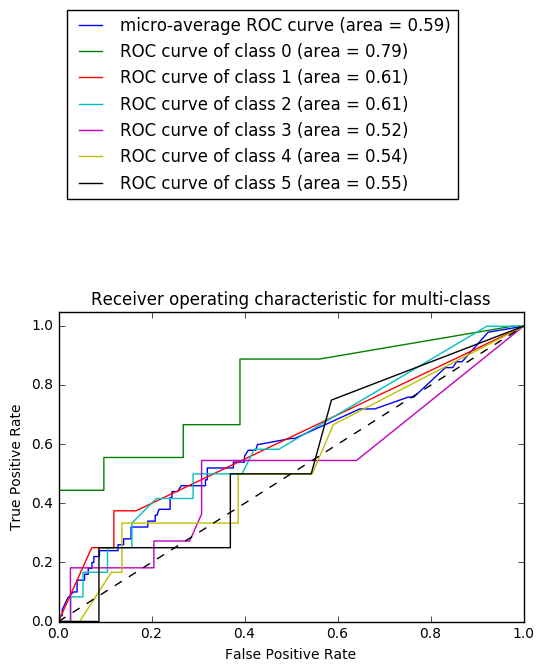

In [632]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(GradientBoostingClassifier())
y_score = classifier.fit(X_train.toarray(), y_train).predict_proba(X_test.toarray())
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()


## Support Vector Machines

In [579]:
  
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=9)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
svm = SVC()
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))

0.4


In [580]:
param_grid = [
  {'C': [1e-1,1, 10, 100, 1000,100000], 'kernel': ['linear','poly']},
  {'C': [0.1,1, 10, 100, 1000,100000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

## Grid Search

In [581]:
grid_search = GridSearchCV(svm, param_grid, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'kernel': 'linear', 'C': 0.1}
0.29


## Confusion Matrix

In [582]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         2                     0          4            0                  0   
1         1                     0          4            0                  0   
2         0                     1          4            0                  1   
3         1                     0          4            0                  0   
4         0                     0          2            0                  0   
5         1                     0          0            0                  0   

   Scifi(5)  
0         0  
1         0  
2         0  
3         0  
4         0  
5         0

## ROC curve

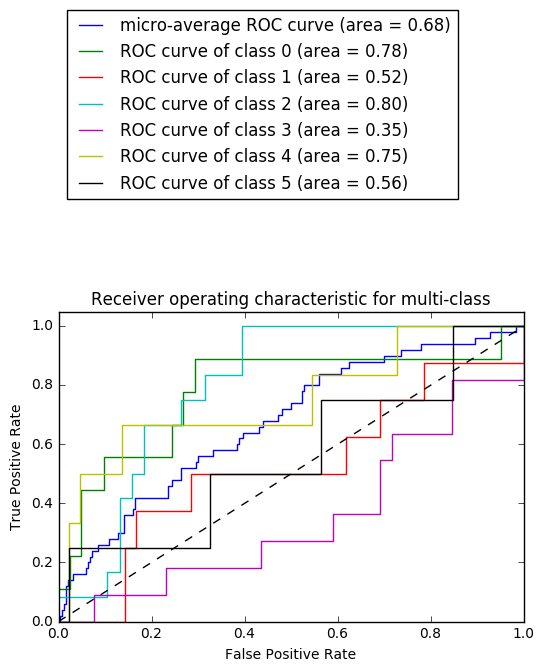

In [584]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## KNN Clustering

In [585]:

X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.28


In [586]:
k_range = list(range(1, 70))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))
#scores

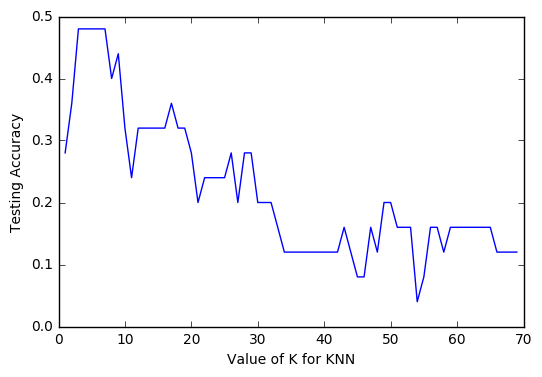

In [587]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [588]:
print("The best k value is",np.argmax(scores)+1)
bestval = np.argmax(scores)+1

The best k value is 3


In [589]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = bestval)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_test,y_test))

0.48


## Confusion Matrix

In [590]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC curve

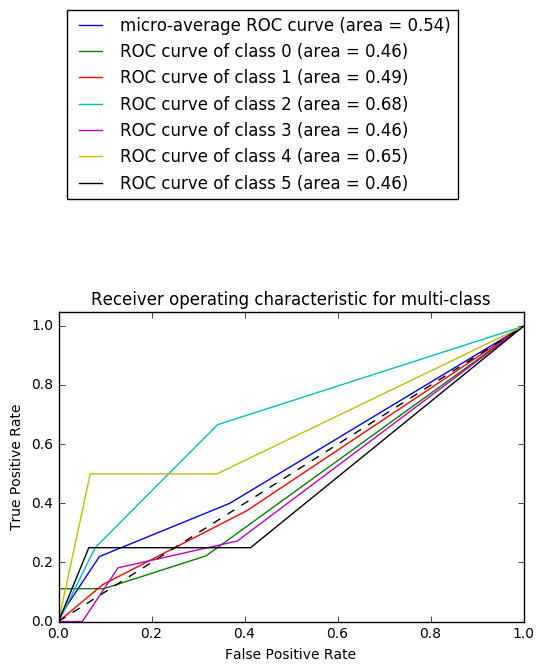

In [592]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(KNeighborsClassifier(n_neighbors = bestval))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Decision Tree Classifier

In [593]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(dtc.score(X_test,y_test))

0.44


## Grid search CV Decision Tree 

In [594]:
parameters={'min_samples_split' : [20,50,80],'max_depth': [5,6,7,8]}
grid_search = GridSearchCV(dtc, parameters, n_jobs=-1, cv=2)
grid_search.fit(movies_list_trans, movies_y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_split': 20}
0.28


## Confusion Matrix

In [595]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC Curve

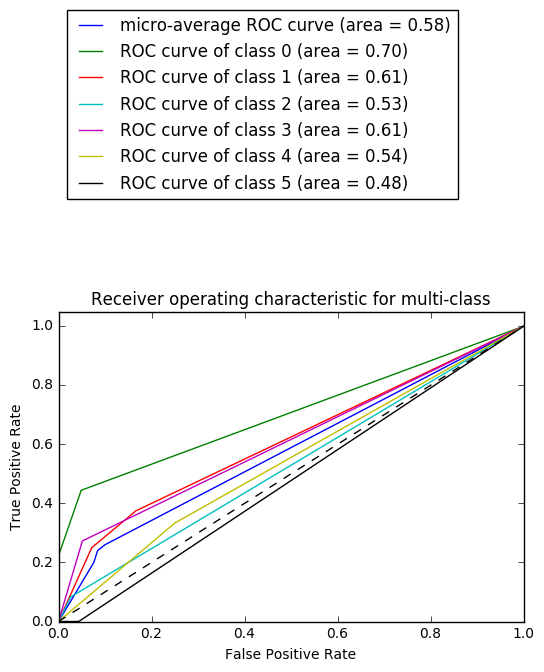

In [597]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(DecisionTreeClassifier(min_samples_split = 20, max_depth= 5))
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## Logistic Regression CV 

In [598]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=7)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
lr = LogisticRegressionCV()
lr.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(lr.score(X_test,y_test))

0.48


## Confusion Matrix

In [599]:
pd.DataFrame(metrics.confusion_matrix(y_test,y_pred),columns = ['Drama(0)','Mystery/Adventure(1)','Action(2)','Thriller(3)','Comedy/Romance(4)','Scifi(5)'])

Drama(0)  Mystery/Adventure(1)  Action(2)  Thriller(3)  Comedy/Romance(4)  \
0         4                     0          1            0                  0   
1         1                     1          1            1                  1   
2         1                     0          2            0                  1   
3         1                     0          0            2                  0   
4         0                     1          0            1                  3   
5         0                     0          0            0                  0   

   Scifi(5)  
0         0  
1         1  
2         2  
3         0  
4         0  
5         0

## ROC Curve

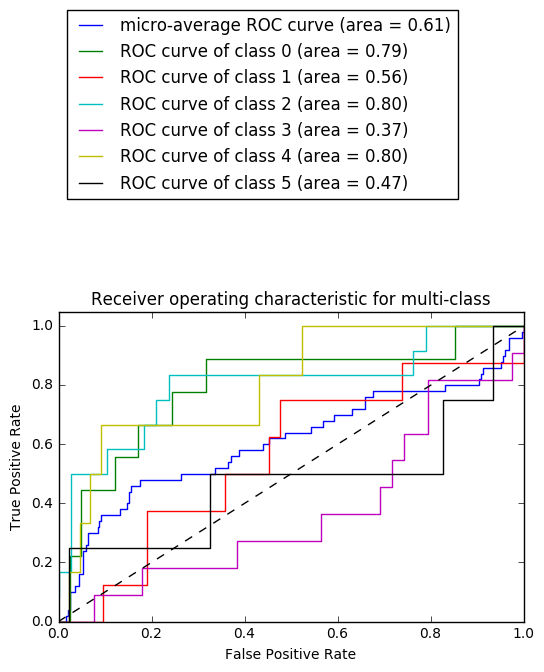

In [601]:
y = label_binarize(movies_y, classes=[0, 1, 2, 3, 4, 5])
n_classes = y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(movies_list, y, test_size=.5,
                                                  random_state=0)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
classifier = OneVsRestClassifier(LogisticRegressionCV())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)
#y_score[:,0]
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(bbox_to_anchor=(0, 2), loc='upper left', ncol=1)
plt.show()

## DOC2VEC

In [602]:
docLabels = []
docLabels = movies_y
#docs = LabeledSentence()
Counter(docLabels)

Counter({0: 20, 1: 18, 2: 20, 3: 18, 4: 15, 5: 9})

In [603]:
data = movies_list
docs = LabeledSentence(words=data,tags=docLabels)

In [604]:
class LabeledLineSentence(object):
    def __init__(self, doc_list, labels_list):
        self.labels_list = labels_list
        self.doc_list = doc_list
    def __iter__(self):
        for idx, doc in enumerate(self.doc_list):
            yield LabeledSentence(words=doc.split(),tags=[self.labels_list[idx]])

In [605]:
it = LabeledLineSentence(data, docLabels)
#it = DocIt(data, docLabels)
words = []
for i in it:
    #j = j+1
    words.append(i[0])


In [606]:
model = gensim.models.Doc2Vec(size=100, window=10, min_count=5, workers=11,alpha=0.025, min_alpha=0.025) # use fixed learning rate
model.build_vocab(it)
for epoch in range(3):
    model.train(it)
    model.alpha -= 0.002 # decrease the learning rate
    model.min_alpha = model.alpha # fix the learning rate, no deca
    model.train(it)

In [607]:
doc_vecs = [model.infer_vector(words[i]) for i in range(0,len(words))]

In [608]:
model.save("doc2vec.model")

In [609]:
len(doc_vecs)

100

In [610]:
len(v)

100

In [611]:
dist = 1 - cosine_similarity(doc_vecs)

In [612]:
X_train, X_test, y_train, y_test = train_test_split(movies_list,movies_y,random_state=9)
cv = CountVectorizer()
cv.fit(X_train)
X_train,X_test = cv.transform(X_train),cv.transform(X_test)
svm = SVC()
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [613]:
dist

array([[  0.00000000e+00,   5.04304469e-01,   6.52972162e-01, ...,
          6.70584202e-01,   7.20833480e-01,   6.80699587e-01],
       [  5.04304469e-01,   0.00000000e+00,   9.71550941e-01, ...,
          7.81596184e-01,   1.01749957e+00,   8.59542787e-01],
       [  6.52972162e-01,   9.71550941e-01,  -2.38418579e-07, ...,
          7.89690852e-01,   7.79766440e-01,   3.00107896e-01],
       ..., 
       [  6.70584202e-01,   7.81596184e-01,   7.89690852e-01, ...,
          0.00000000e+00,   8.10700059e-01,   8.47880244e-01],
       [  7.20833480e-01,   1.01749957e+00,   7.79766440e-01, ...,
          8.10700059e-01,   0.00000000e+00,   8.53255868e-01],
       [  6.80699587e-01,   8.59542787e-01,   3.00107896e-01, ...,
          8.47880244e-01,   8.53255868e-01,  -1.19209290e-07]], dtype=float32)

In [614]:
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [615]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e',5 : '#b6a61e' }

#set up cluster names using a dict
cluster_names = {0: 'Drama', 
                 1: 'Mystery/Adventure', 
                 2: 'Action', 
                 3: 'Thriller', 
                 4: 'Comedy/Romance',
                 5:'Scifi',
                  }

In [616]:
kmeans = KMeans(n_clusters=6).fit(doc_vecs)
y_pred = kmeans.predict(doc_vecs)
y_pred

array([4, 4, 2, 2, 0, 2, 0, 2, 0, 2, 1, 4, 1, 1, 4, 2, 5, 1, 1, 2, 4, 4, 4,
       2, 5, 5, 5, 4, 2, 2, 3, 1, 2, 2, 5, 4, 2, 2, 2, 2, 1, 2, 5, 2, 5, 1,
       2, 1, 2, 2, 2, 2, 5, 4, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 4, 1, 2, 1, 2, 1, 0, 0,
       2, 2, 4, 4, 2, 2, 1, 2], dtype=int32)

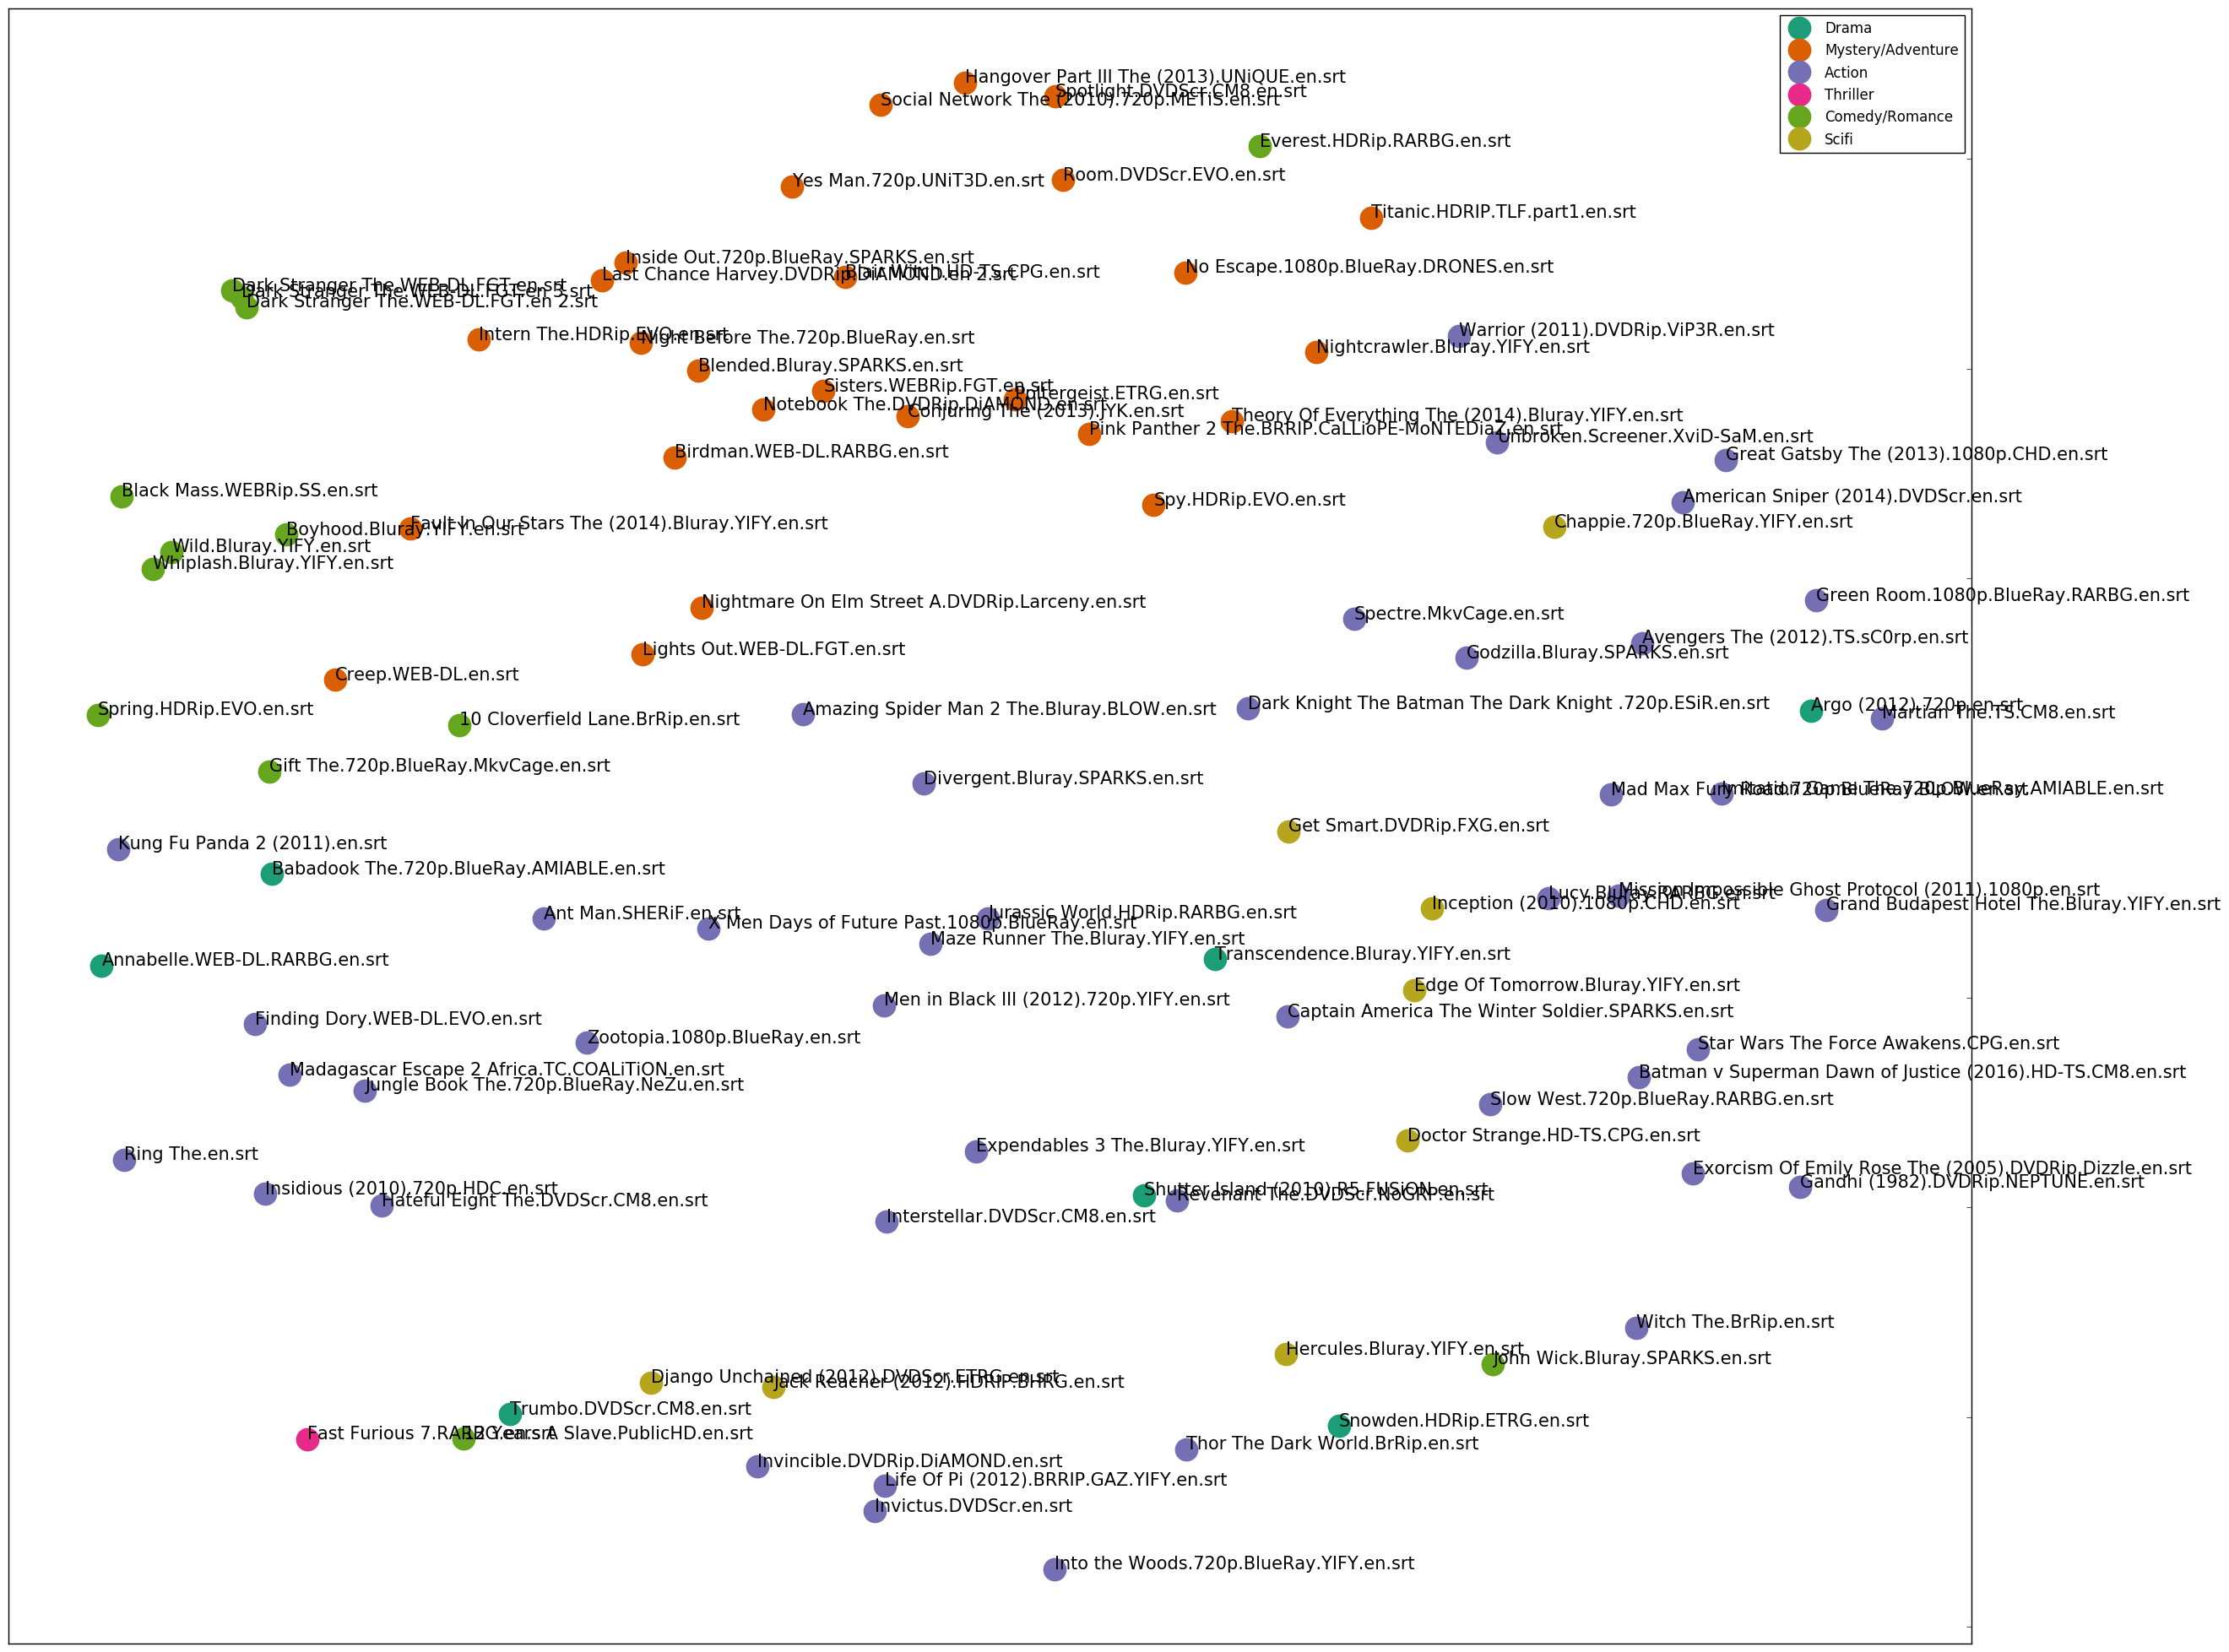

In [617]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y':ys , 'label': y_pred, 'title': movie_labels})  

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(30, 25)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=20, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=15)  

    
    
plt.show() #show the plot

In [618]:
class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 400);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [619]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame({'x':xs, 'y': ys, 'label': y_pred, 'title' : movie_labels}) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -150px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(16,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=20, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

